# Generate TreeMap from iModulon Table

iModulon Table needs the following columns:

- Name
- Category
- Explained Variane


This notebook requires an anaconda environment with R installed `conda install -c r r`

This notebook requires an anaconda environment with pandas `conda install -c conda-forge pandas`

###### Load the extension that lets you use r in python notebooks. If this gives error check if you have the extension installed or google how to install this extension

In [1]:
%load_ext rpy2.ipython

In [2]:
#preview of the csv file used to make the figure
import pandas as pd
tree_df = pd.read_csv('../data/tree_df_saci.csv', index_col=0)
tree_df.head()

,name,regulator,Category,description,TP,regulon_size,imodulon_size,ExplainedVariance,n_regs,ecoli_ortholog,Presented?
0,pseudogene,NaN,Genomic,Putative pseudogene repair?,NaN,NaN,2,0.003684,NaN,NaN,NaN
1,heat-stress,NaN,Functional,"Stage II sporulation protein, DedA family prot...",NaN,NaN,38,0.010055,NaN,NaN,NaN
2,SoxL2N,NaN,Functional,Cytochrome Oxidase bc1 complex (SoxL2N---CbsAB...,NaN,NaN,5,0.060497,NaN,OxyR,NaN
3,long-chain-fatty-acid-metabolism,BarR?,Functional,Putative Fatty-Acid / beta-alanine related iMo...,NaN,NaN,17,0.027021,NaN,NaN,NaN
4,Riboflavin,NaN,Vitamin B,Riboflavin biosynthesis iModulon,NaN,NaN,6,0.004310,NaN,NaN,NaN


###### You can use R in python notebook with the R-magic. After you have loaded the extension shown above, just put '%%R' on top of the cells you want to use R in. Printed figure subject to change depending on figsize parameters used when saving

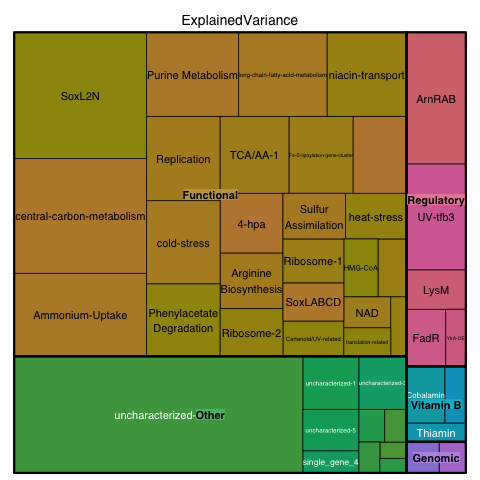

In [3]:
%%R
library('treemap') #load treemap, make sure its installed in your env
tree_df = read.csv('../data/tree_df_saci.csv', row.names='X') #load the data
treemap(tree_df, index=c('Category', 'name'), vSize='ExplainedVariance') #make the treemap

#### If you want to save the figure as svg add the following lines.

In [5]:
%%R
library('treemap')

svg(filename="../figures/iModulon_treemap.svg", #file where it will be saved
    width=16, #svg params, change as you need
    height=12, 
    pointsize=12)
tree_df = read.csv('../data/tree_df_saci.csv', row.names='X') #load data
treemap(tree_df, index=c('Category', 'name'), vSize='ExplainedVariance') #make treemap
dev.off() #close svg

quartz_off_screen 
                2 
